# Cuadrados mínimos

primero generamos un modelo con ruido

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
N = 200

In [77]:
x = np.random.uniform(1, 7, N)

In [78]:
a = 3
b = -2

In [79]:
y = a*x + b

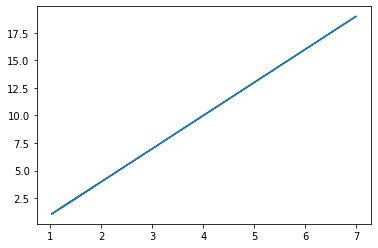

In [80]:
plt.plot(x, y)

In [81]:
noise = np.random.normal

In [82]:
noise = np.random.normal

In [83]:
noise = np.random.normal(0, 1, len(x))

In [84]:
yn = y + noise

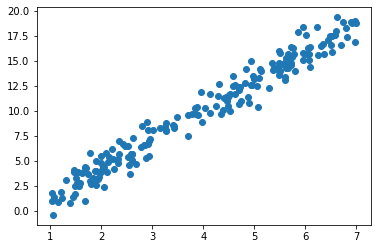

In [85]:
plt.plot(x, yn, linestyle='None', marker='o')

In [111]:
yy = np.ones((len(x), 1))
A = np.column_stack((x, yy))

In [112]:
At = np.transpose(A)

In [113]:
A_ = At @ A

In [121]:
b_ = At @ yn

In [122]:
A_

array([[3683.17277842,  782.18599903],
       [ 782.18599903,  200.        ]])

In [123]:
b_

array([9475.6376599 , 1957.36469874])

In [124]:
def diag_numpy(A, b, verbose=False):
    '''
    Implementa el método de eliminación de Gauss para resolver
    un sistema de ecuaciones
    '''
    A = np.array(A) 
    b = np.array(b) 
    n = len(b)
    M = np.zeros((A.shape[0],A.shape[1]+1))
    M[:,:-1] = A
    M[:,-1] = b

    vname = ['x','y','z','v','w','p','q','g','s','d']

    for i in range(n):
        for j in range(n):
            if i != j:

                if verbose:
                    niceprint(M, [j,i]); foo = input('')
                    print((f'\nfila {j}, columna {i}'
                           f' - Operación: E{j} ← E{j} - µ E{i},\n                   '
                           f' µ = E{j}{vname[i]}/E{i}{vname[i]} = {M[j][i]}/{M[i][i]}'
                           f' = {M[j][i]/M[i][i]}'))

                factor = M[j][i]/M[i][i]
                M[j,:] = M[j,:] - factor*M[i,:]

        if verbose:
            niceprint(M); foo = input('')
    x = b*0.
    for i in range(n):
        x[i] = M[i][n]/M[i][i]

    return M, x 

In [128]:
M, ab = diag_numpy(A_, b_)

In [126]:
fit = lambda x: ab[0]*x + ab[1]

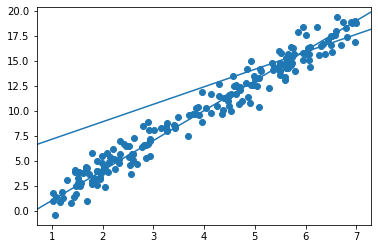

In [131]:
plt.plot(x, yn, linestyle='None', marker='o')
plt.axline((1, a+b), (6, 6*a+b))
plt.axline((1, fit(a)), (6, fit(6)))